<a href="https://colab.research.google.com/github/arnaldocaetanocardoso/optimization_code/blob/main/quast%C3%A3o2_2_3_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rcpsilva/BCC342_Intro_to_Optimization

import sys
sys.path.append('/content/BCC342_Intro_to_Optimization/')

import line_search as ls
import numpy as np
import matplotlib.pyplot as plt
from fmin import gradient_descent,powell

fatal: destination path 'BCC342_Intro_to_Optimization' already exists and is not an empty directory.


In [2]:
#para implementação original
f = lambda x : x[0]**2 + x[1]**2 + x[0]*x[1]
grad = lambda x : np.array([2*x[0] + x[1],2*x[1] + x[0]]) 
h = lambda x: np.array([[2, 1],[1, 2]])

#=============================================================
#famosa função da banana
#f = lambda x: (100*(x[1] - x[0]**2)**2 + (x[0]-1)**2) 
#grad = lambda x: np.array([-400*(x[1]-x[0]**2)*x[0] + 2*(x[0]-1), 200*(x[1]-x[0]**2)])
#h = lambda x: np.array([[-400*x[1]+1200*x[0]**2,-400*x[0]],[-400*x[0],200]])


In [3]:
##implementação de newton, é parecidad com o método de gradiente.
def newton(x,f,grad,h,tol=1e-6):

  lx = [x]
  lfx = [f(x)]
  gradx = grad(x);
  hx = h(x);

  while np.linalg.norm(gradx) > tol:

    hinv = np.linalg.inv(h(x));
    x = x - np.matmul(hinv,gradx.T); #T calcula transposta, vetor coluna em linha
    gradx = grad(x);
    lx.append(x);
    lfx.append(f(x));

  return x,f(x),lx,lfx

In [4]:
x,fx,lx,lfx = newton(np.array([1,-2]),f,grad,h,tol=1e-6)
#x,fx,lx,lfx = gradient_descent(np.array([-1,-2]),f,grad,tol=1e-6,alpha=[]) # para banana

plotagem


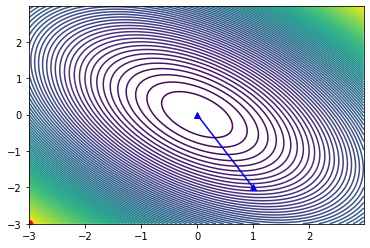

In [5]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.ndarray((len(X),len(X[0])))
z=Z
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j] = f([X[i][j],Y[i][j]])
#código de plotagem
x0 = [x[0] for x in lx]
x1 = [x[1] for x in lx]

fig, ax = plt.subplots()
ax.contour(X, Y, Z, 100)
ax.plot(x0,x1,'^b-')
ax.plot(x[0],x[1],'or')


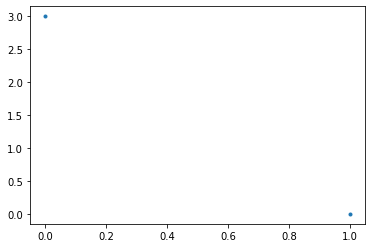

In [6]:
plt.plot(lfx,'.');  #iterações